In [1]:
#Importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve

C:\Users\Monika\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Read the data

data = pd.read_csv("insurance_part2_data.csv")

## EDA

In [3]:
data.shape

(3000, 10)

In [4]:
data.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
# check missing values

data.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

No missing values found

In [6]:
# check for proportion of Target

data.Claimed.value_counts(normalize=True)

No     0.692
Yes    0.308
Name: Claimed, dtype: float64

30% data has claimed status as "yes" which is good enough for predictions. 

### Univariate Analysis

In [7]:
#Checking values for categorical variables

for col in data.columns:
    if data[col].dtype =='object':
        print(col,":")
        print(data[col].value_counts(),"\n")

Agency_Code :
EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64 

Type :
Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64 

Claimed :
No     2076
Yes     924
Name: Claimed, dtype: int64 

Channel :
Online     2954
Offline      46
Name: Channel, dtype: int64 

Product Name :
Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64 

Destination :
ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64 



In [8]:
data.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


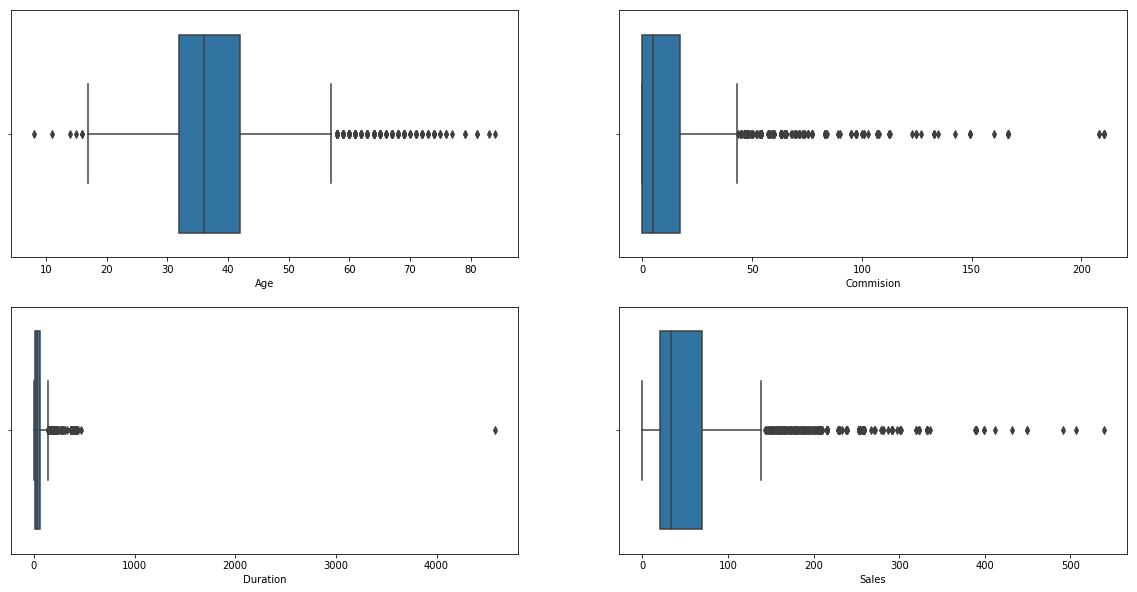

In [9]:
fig,axes = plt.subplots(nrows = 2,ncols=2)
fig.set_size_inches(20,10)
a = sns.boxplot(x=data['Age'], ax=axes[0][0])
b = sns.boxplot(x=data['Commision'], ax=axes[0][1])
c = sns.boxplot(x=data['Duration'], ax=axes[1][0])
d = sns.boxplot(x=data['Sales'], ax=axes[1][1])

plt.show()

Outliers are present in all the numerical variables

There are outliers in all the variables. CART and Random Forest are robust to outliers. 
Neural Networks can handle outliers if there are more hidden layers and if the number of outliers is lesser. For now, we will keep the data as it is, and if we find the performance of the neural network to be lesser, then we will treat the outliers and re-build neural network model

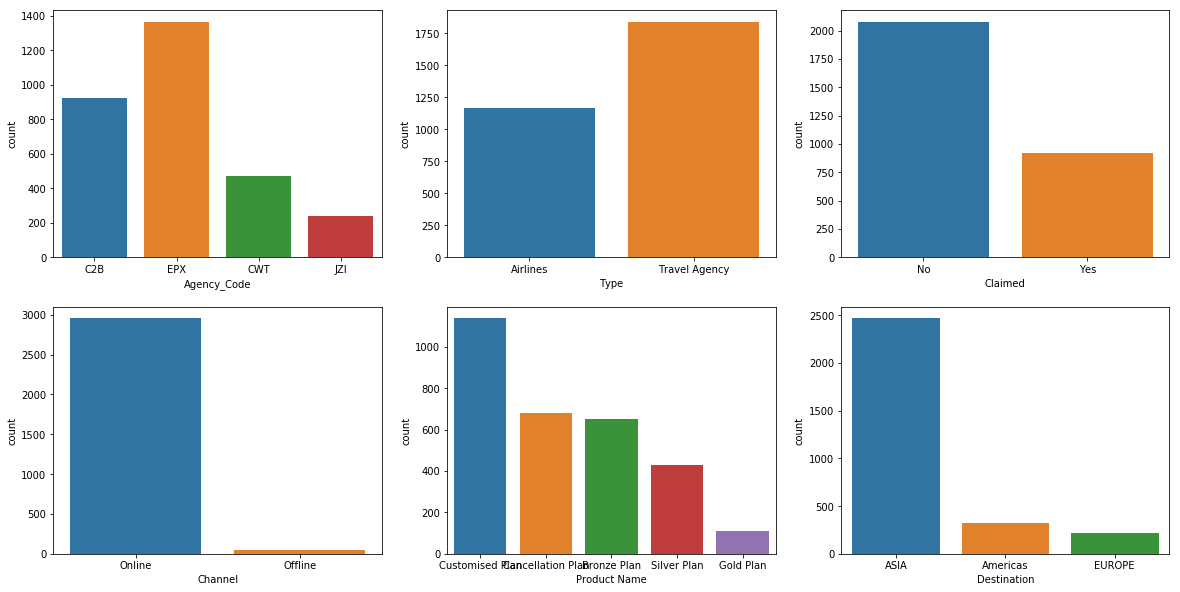

In [10]:
fig,axes = plt.subplots(nrows = 2,ncols=3)
fig.set_size_inches(20,10)
a = sns.countplot(x=data['Agency_Code'], ax=axes[0][0])
b = sns.countplot(x=data['Type'], ax=axes[0][1])
c = sns.countplot(x=data['Claimed'], ax=axes[0][2])
d = sns.countplot(x=data['Channel'], ax=axes[1][0])
e = sns.countplot(x=data['Product Name'], ax=axes[1][1])
f = sns.countplot(x=data['Destination'], ax=axes[1][2])

plt.show()

### Bi-variate Analysis

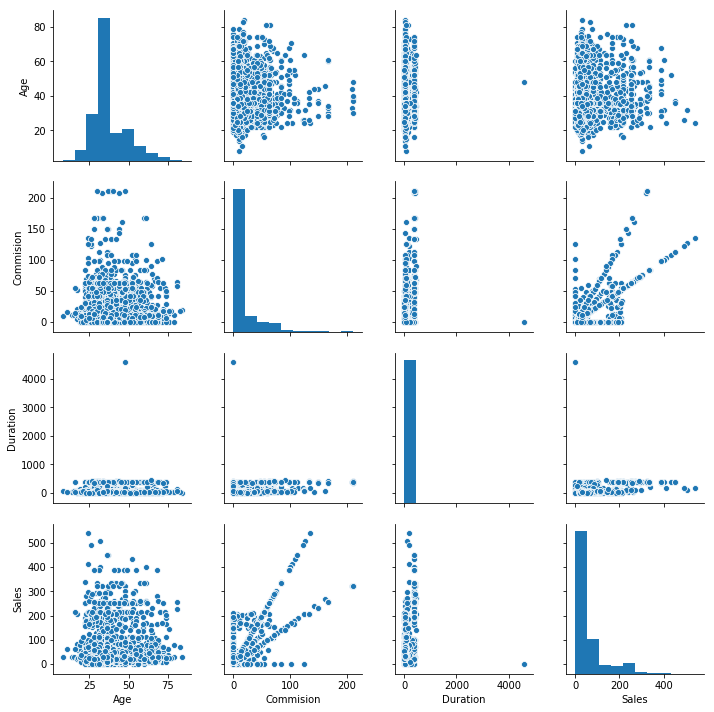

In [11]:
sns.pairplot(data[['Age','Commision','Duration','Sales']])

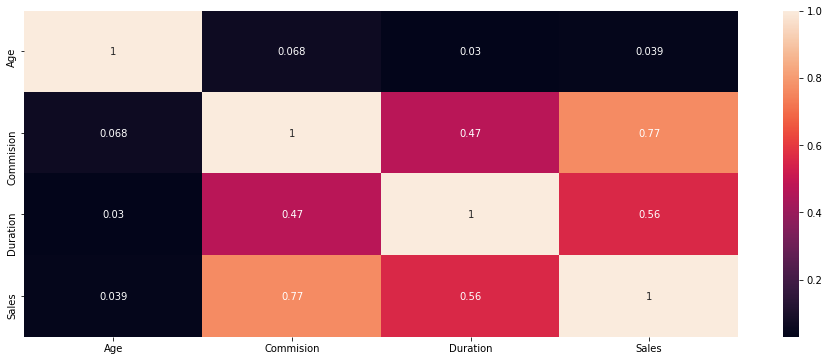

In [12]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),annot = True)

Commision and Sales are co-related to each other with co-efficient = 0.77.

In [13]:
#Check for duplicates

dupes = data.duplicated()
print('Number of duplicate rows = %d' %(dupes.sum()))
data[dupes].sort_values(by ='Age')

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2777,24,EPX,Travel Agency,No,0.00,Online,39,10.00,Cancellation Plan,ASIA
1483,25,C2B,Airlines,No,28.80,Online,17,72.00,Bronze Plan,ASIA
2920,25,C2B,Airlines,No,12.40,Online,1,31.00,Bronze Plan,ASIA
63,30,C2B,Airlines,Yes,15.00,Online,27,60.00,Bronze Plan,ASIA
2081,30,C2B,Airlines,Yes,63.21,Online,365,252.85,Silver Plan,ASIA
2892,30,C2B,Airlines,Yes,63.21,Online,364,252.85,Silver Plan,ASIA
2187,30,EPX,Travel Agency,No,0.00,Online,17,80.00,Cancellation Plan,Americas
2929,30,C2B,Airlines,No,6.00,Online,4,15.00,Bronze Plan,ASIA
2597,31,CWT,Travel Agency,Yes,29.70,Online,10,49.50,Customised Plan,ASIA
1215,32,C2B,Airlines,Yes,46.96,Online,365,187.85,Silver Plan,ASIA


In [14]:
# Drop Duplicates

df = data.copy()
#df.drop_duplicates(inplace=True)

Not Dropping the duplicates as atleast one column has different value

In [15]:
#confirm duplicates have been removed
#dupes = df.duplicated()
#print('Number of duplicate rows = %d' %(dupes.sum()))
#df[dupes]

In [16]:
#check target proportion after dropping duplicates
#dupes = df.duplicated()
df.Claimed.value_counts(normalize=True)

No     0.692
Yes    0.308
Name: Claimed, dtype: float64

In [17]:
#converting categorical data to numerical

for column in df:
    if df[column].dtype == 'object':
        df[column]=pd.Categorical(df[column]).codes


In [66]:
#check target proportion after coverting to numerical
df.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [18]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


## Train Test Split

In [19]:
#Extract x and y
y= df['Claimed']
x= df.drop(['Claimed'],axis =1)

In [20]:
# split the data into 70% training and 30% test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30,random_state = 1)

## Decision Tree Classifier

In [21]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [22]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'max_depth' : [2,3,4,5]
}

dt_model = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [24]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [25]:
grid_search.best_params_

{'max_depth': 4}

In [26]:
best_grid = grid_search.best_estimator_

## Predicting Train and Test Data

In [27]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

## CART Model Performance on Training Data

In [28]:
print(classification_report(y_train,ytrain_predict))

             precision    recall  f1-score   support

          0       0.85      0.86      0.85      1471
          1       0.66      0.64      0.65       629

avg / total       0.79      0.79      0.79      2100



In [29]:
confusion_matrix(y_train, ytrain_predict)

array([[1263,  208],
       [ 226,  403]], dtype=int64)

In [30]:
#Train Data Accuracy
cart_train_acc=best_grid.score(x_train,y_train) 
cart_train_acc

0.7933333333333333

AUC: 0.833


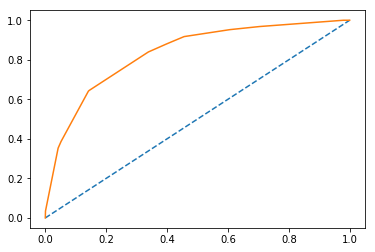

In [31]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

## CART Model Performance on Test Data

In [32]:
print(classification_report(y_test,ytest_predict))

             precision    recall  f1-score   support

          0       0.81      0.89      0.84       605
          1       0.71      0.57      0.63       295

avg / total       0.77      0.78      0.77       900



In [33]:
confusion_matrix(y_test, ytest_predict)

array([[536,  69],
       [128, 167]], dtype=int64)

In [34]:
#Test Data Accuracy
cart_test_acc=best_grid.score(x_test,y_test)
cart_test_acc

0.7811111111111111

AUC: 0.798


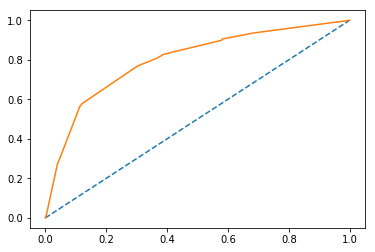

In [35]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

## Generating Tree

In [36]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://webgraphviz.com/

## Variable Importance

In [37]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.604155
Sales         0.250846
Product Name  0.075665
Duration      0.038296
Commision     0.029430
Age           0.001607
Type          0.000000
Channel       0.000000
Destination   0.000000


Model is good as train and test score is almost same but recall for Claimed 'yes' is less. Therefore it will not be a good prediction model

# Cart Conclusion

<b>Train Data:</b>  
    AUC: 83.3%        
    Accuracy: 79%        
    Sensitivity: 79%     
    Precision: 79%        
    f1-Score: 79%       
            
<b>Test Data:</b>      
    AUC: 79.8%      
    Accuracy:78%      
    Sensitivity: 78%    
    Precision: 77%       
    f1-Score: 77%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
  
Agency_Code is the most important variable for predicting insurance claims

## Random Forest Classifier

In [38]:
param_grid={
    'max_depth' : [6,],#3,4,5,7
    'max_features': [4],#5,6
    'n_estimators': [201]#101,301
}

rfcl = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [39]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [6], 'max_features': [4], 'n_estimators': [201]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
grid_search.best_params_

{'max_depth': 6, 'max_features': 4, 'n_estimators': 201}

In [41]:
best_grid = grid_search.best_estimator_

### Predicting training and test data

In [42]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

### RF Model Performance Evaluation on Training Data

In [43]:
confusion_matrix(y_train,ytrain_predict)

array([[1341,  130],
       [ 222,  407]], dtype=int64)

In [44]:
rf_train_acc=best_grid.score(x_train,y_train) 
rf_train_acc

0.8323809523809523

In [45]:
print(classification_report(y_train,ytrain_predict))

             precision    recall  f1-score   support

          0       0.86      0.91      0.88      1471
          1       0.76      0.65      0.70       629

avg / total       0.83      0.83      0.83      2100



Area under Curve is 0.7793417843003958


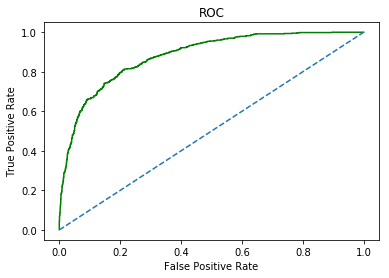

In [46]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(x_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid.predict(x_train))
print('Area under Curve is', rf_train_auc)

### RF Model Performance Evaluation on Test Data

In [47]:
confusion_matrix(y_test,ytest_predict)

array([[550,  55],
       [146, 149]], dtype=int64)

In [48]:
rf_test_acc=best_grid.score(x_test,y_test) 
rf_test_acc

0.7766666666666666

In [49]:
print(classification_report(y_test,ytest_predict))

             precision    recall  f1-score   support

          0       0.79      0.91      0.85       605
          1       0.73      0.51      0.60       295

avg / total       0.77      0.78      0.76       900



Area under Curve is 0.7070878274268105


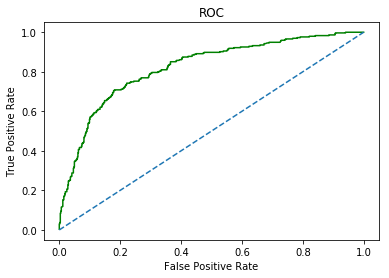

In [50]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(x_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid.predict(x_test))
print('Area under Curve is', rf_test_auc)

In [51]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.279645
Product Name  0.183051
Sales         0.177954
Commision     0.127545
Duration      0.092719
Age           0.072993
Type          0.046551
Destination   0.011035
Channel       0.008508


## Random Forest Conclusion

<b>Train Data:</b>  
    AUC: 77%        
    Accuracy: 83%        
    Sensitivity: 83%     
    Precision: 83%        
    f1-Score: 83%       
            
<b>Test Data:</b>      
    AUC: 70%      
    Accuracy: 77%      
    Sensitivity: 78%    
    Precision: 77%       
    f1-Score: 76%     
  
Training and Test set results are almost similar, and with the overall measures good, the model is a good model.  
  
Agency_Code is the most important variable for predicting insurance claim

# Building a Neural Network Classifier

In [52]:
param_grid = {
    'hidden_layer_sizes': [400], #,50,100,200,300
    'max_iter': [1500], #5000,10000,7000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01],#0.001 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5)

In [53]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [400], 'max_iter': [1500], 'solver': ['adam'], 'tol': [0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [54]:
grid_search.best_params_

{'hidden_layer_sizes': 400, 'max_iter': 1500, 'solver': 'adam', 'tol': 0.01}

In [55]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=400, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.01, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Predicting the Training and Testing data

In [56]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

## NN Model Performance Evaluation on Training data

In [57]:
confusion_matrix(y_train,ytrain_predict)

array([[1306,  165],
       [ 294,  335]], dtype=int64)

In [58]:
nn_train_acc=best_grid.score(x_train,y_train) 
nn_train_acc

0.7814285714285715

In [59]:
print(classification_report(y_train,ytrain_predict))

             precision    recall  f1-score   support

          0       0.82      0.89      0.85      1471
          1       0.67      0.53      0.59       629

avg / total       0.77      0.78      0.77      2100



Area under Curve is 0.7793417843003958


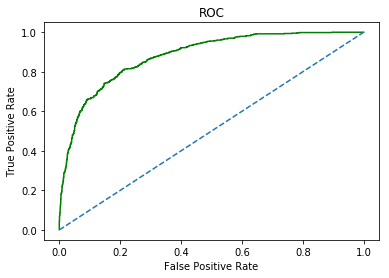

In [60]:
nn_train_fpr, nn_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(x_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(y_train,best_grid.predict(x_train))
print('Area under Curve is', rf_train_auc)

### NN Model Performance Evaluation on Test Data

In [61]:
confusion_matrix(y_test,ytest_predict)

array([[555,  50],
       [157, 138]], dtype=int64)

In [62]:
nn_test_acc=best_grid.score(x_test,y_test) 
nn_test_acc

0.77

In [63]:
print(classification_report(y_test,ytest_predict))

             precision    recall  f1-score   support

          0       0.78      0.92      0.84       605
          1       0.73      0.47      0.57       295

avg / total       0.76      0.77      0.75       900



Area under Curve is 0.7070878274268105


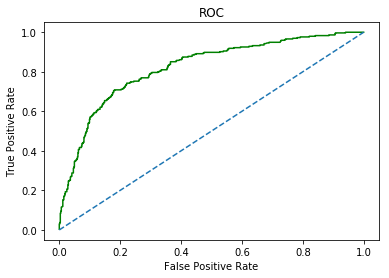

In [64]:
nn_test_fpr, nn_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(x_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(y_test,best_grid.predict(x_test))
print('Area under Curve is', rf_test_auc)

# Neural Network Conclusion

<b>Train Data:</b>  
    AUC: 77%        
    Accuracy: 78%        
    Sensitivity: 78%     
    Precision: 77%        
    f1-Score: 77%       
            
<b>Test Data:</b>      
    AUC: 70%      
    Accuracy: 77%      
    Sensitivity: 77%    
    Precision: 76%       
    f1-Score: 75%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  

# Final Conclusion

## Comparison of the performance metrics from the 3 models

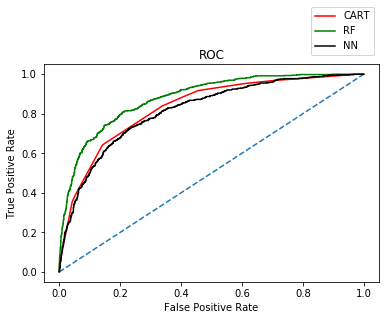

In [65]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model

Overall all the 3 models are reasonaly stable enough to be used for making any future predictions.
From Cart and Random Forest Model, the variable Agency_Code is found to be the most useful feature amongst all other features for predicting if a person will claim insurance or not. If claim is yes, then those customers have more chances of claiming insurance.